In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df['flower']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)


In [24]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


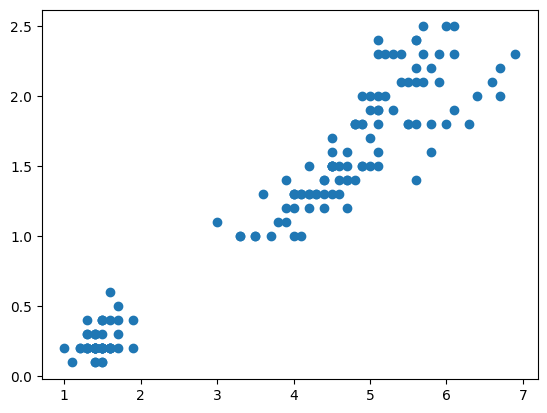

In [25]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [31]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
df['cluster']=yp
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [33]:
df['cluster'].unique()

array([0, 1, 2])

Text(0, 0.5, 'petal width (cm)')

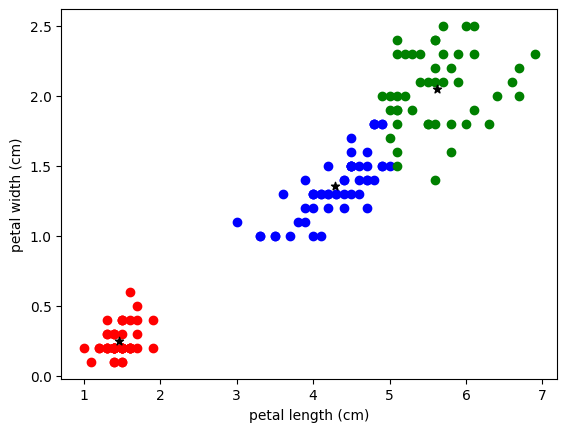

In [38]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='green')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [35]:
centroids=km.cluster_centers_
centroids

array([[1.462     , 0.246     ],
       [4.29259259, 1.35925926],
       [5.62608696, 2.04782609]])

In [42]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)  #inertia gives the sum of squared distances to closest cluster center

In [43]:
sse

[646.7886666666666,
 111.99687462863933,
 31.412885668276978,
 22.175307806324113,
 20.867201893622948,
 11.904743983957221,
 9.788476968565206,
 9.746030625076678,
 8.643352487295983]

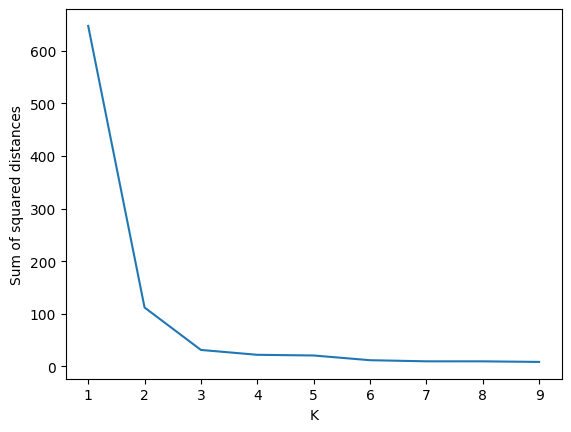

In [44]:
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.plot(k_rng, sse)